In [189]:
import numpy as np
import yfinance as yf
import requests

import matplotlib.pyplot as plt

In [90]:
def get_historical_data(symbol, period="5min"):
    
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={period}&outputsize=full&apikey="
    r = requests.get(url)
    data = r.json()
    
    return data

In [180]:
def remove_after_hour_data(data):
    
    dates_list = list(data['Time Series (5min)'].keys())
    bool_list = [(int(d.split(" ")[-1].split(":")[0]) < 16) and (int(d.split(" ")[-1].split(":")[0]) > 8) for d in dates_list]
    
    data_array = np.array(list(data['Time Series (5min)'].values()))[bool_list]
    date_array = np.array(list(data['Time Series (5min)'].keys()))[bool_list]
    
    return date_array, data_array

In [181]:
def split_data_by_day(date_array, data_array):
    
    days = np.array([d.split(" ")[0] for d in date_array])
    unique_days = np.unique(days)
    
    list_data_per_day = []
    for d in unique_days:
    
        mask = days == d

        daily_data = data_array[mask]
        
        daily_data = [(float(d['2. high']) + float(d['3. low']))/2 for d in daily_data]

        list_data_per_day.append(daily_data)
        
    return list_data_per_day

In [182]:
data = get_historical_data("RKLB")

In [183]:
date_array, data_array = remove_after_hour_data(data)

In [184]:
list_data_per_day = split_data_by_day(date_array, data_array)

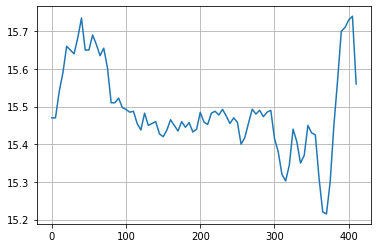

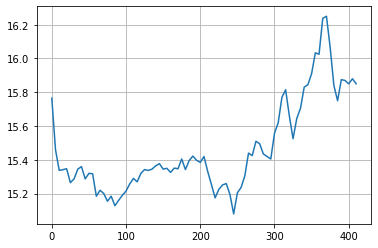

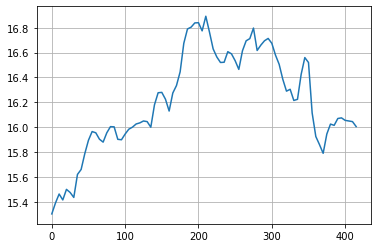

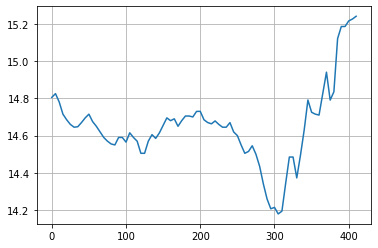

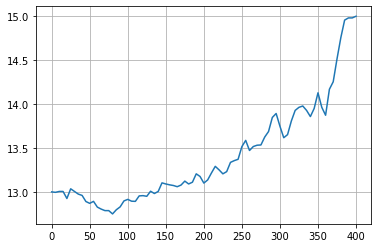

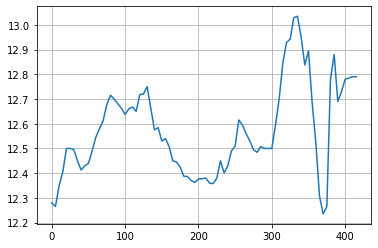

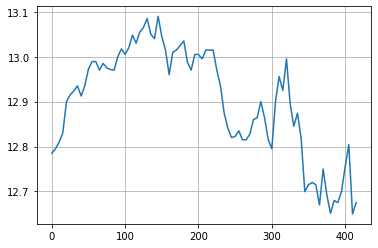

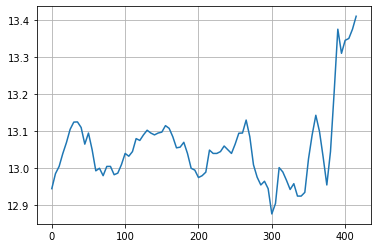

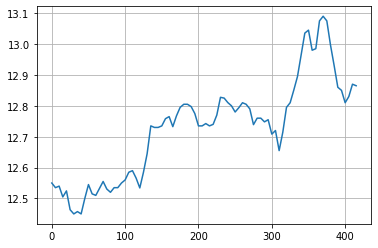

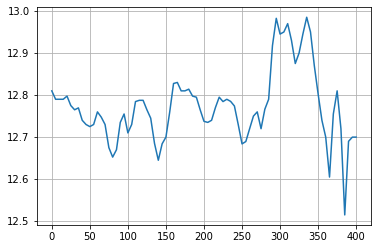

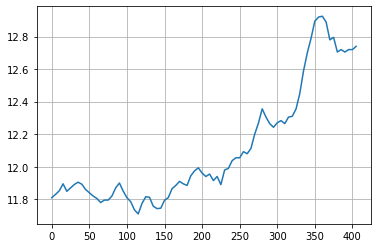

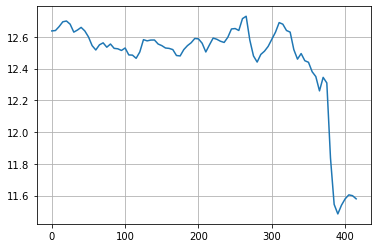

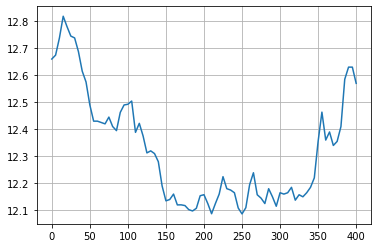

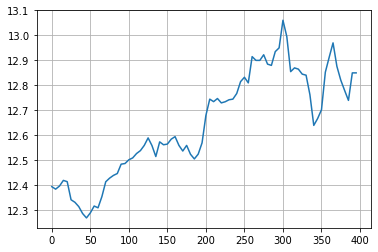

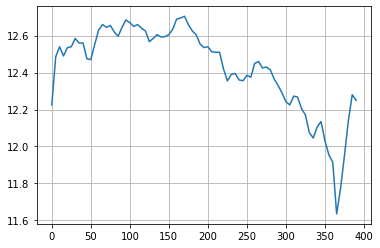

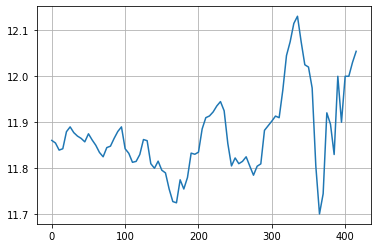

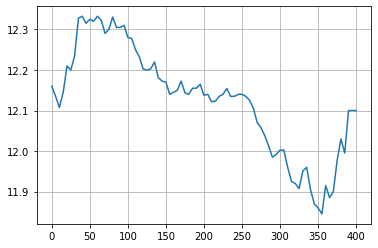

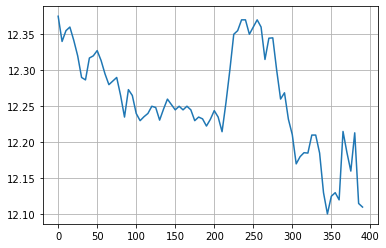

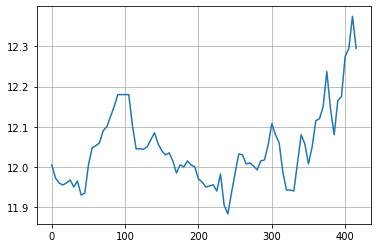

In [200]:
for d in list_data_per_day:
    
    plt.plot()
    plt.grid(True)
    plt.plot(np.arange(len(d))*5, d)
    plt.show()